# Project 3(5a): NLP Sentiment Analysis - Hugging Face Model 1

Done by: Richelle-Joy Chia, a Redditor-and-data-science enthusiast! 



Problem statement: Through natural language processing and classification models, how can we help Reddit and other interested parties classify posts based on the texts used by people who may be depressed or anxious? Furthermore, how can sentiment analysis be utilized to detect emotions associated with depression and anxiety?

## Summary

To address part 2 of the problem statement, I conducted a sentiment analysis using 2 models from hugging face to further label each post with the specific emotion(s). The question to think about is among those who experience depression and anxiety, what is the underlying root cause for such mood disorders? One explanation is that on top of feeling sad or anxious (primary emotions), these people could be feeling hurt, nervous, fearful, or annoyed. Hence, I hope that using a model that examines primary emotions (Model 1) as well as secondary emotions (Model 2) would provide some deeper insights into how people are feeling when they write their reddit post. 


## Hugging Face - Model 1 (jhart)

Model 1 has been trained on 6 diverse datasets predicting Ekman's 6 basic emotions + a neutral class. This model aims to classify emotions from English text data. 

- https://huggingface.co/j-hartmann/emotion-english-roberta-large 


In [1]:
# import libraries 

import matplotlib.pyplot as plt
import pandas as pd
import nltk
import seaborn as sns
import sys
import tensorflow.keras
import tensorflow as tf
import numpy as np
from tqdm import tqdm 
from transformers import pipeline # loading pre-trained models for contextual word embeddings (Hugging Face)

In [4]:
# import data 

data = pd.read_csv('../data.csv')

In [5]:
# drop rows that have been affected by transforming pd df to csv

data.dropna(axis=0, inplace=True)

- Based on some preliminary analysis, both Hugging Face models have a pre-set word limit of 512. I will be exploring the data to see if there are alot of rows with more than 500 words. Given the results below, we can see the 99% of data has less than 500 words. As such, we won't be losing much information if we were to use both models from Hugging Face. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023101E4A280>]],
      dtype=object)

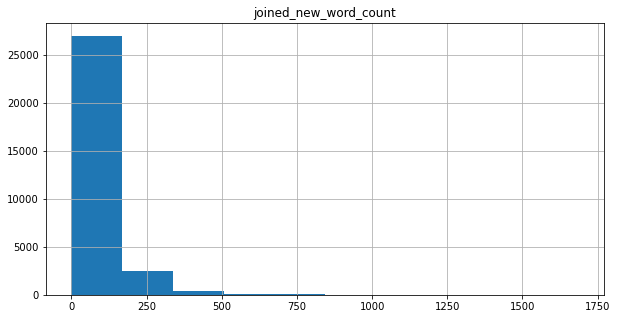

In [6]:
# plot histogram to see word count distribution

data[['joined_new_word_count']].hist(figsize=(10,5))

In [7]:
# calculate the percentage of data that has less than 500 words

(data['joined_new_word_count']<500).sum()/len(data)

0.9936934832660416

In [8]:
# run pipeline to activate model 1

classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", truncation=True)
classifier("I love my life")

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


[{'label': 'joy', 'score': 0.9614477157592773}]

In [1]:
# custom function to store the respective scores (in this scenario, scores refer to the probability of the emotion occuring, which will be used as the metric) 

def classify(df):
    labels=[]
    scores=[]
    for i in tqdm(df['joined_new'], desc = 'tqdm() Progress Bar'): 
        index = 0
        if index < len(df):
            output = classifier([i])
            labels.append(output[0]['label'])
            scores.append(output[0]['score'])
            index += 1
    df['labels_jhart'] = pd.DataFrame(labels)
    df['scores_jhart'] = pd.DataFrame(scores)
    return

In [10]:
%%time
classify(data)

tqdm() Progress Bar: 100%|█████████████████████████████████████████████████████| 29969/29969 [1:08:28<00:00,  7.29it/s]

Wall time: 1h 8min 28s


In [11]:
# store df as csv

data.to_csv('7emo_data_updated.csv', index=False)

## I have included the description of Model 2 and the associated codes in the next notebook. 